# Zestaw zadań: Analiza błędow
## Zadanie 2
### Autor: Artur Gęsiarz

In [11]:
import numpy as np
from fractions import Fraction
import matplotlib.pyplot as plt

### Implementacja pomocniczych funkcji
#### - Pojedyncza, podwójna prezycja oraz wykorzystanie fractions

In [12]:
def generate_sequence_single(n = 225):
    x = np.zeros(n, dtype=np.float32)
    x[0] = 1/3
    x[1] = 1/12
    for k in range(2, n):
        x[k] = 2.25 * x[k-1] - 0.5 * x[k-2]
    return x

def generate_sequence_double(n = 60):
    x = np.zeros(n, dtype=np.float64)
    x[0] = 1/3
    x[1] = 1/12
    for k in range(2, n):
        x[k] = 2.25 * x[k-1] - 0.5 * x[k-2]
    return x

def generate_sequence_fraction(n = 225):
    x = np.zeros(n, dtype=object)
    x[0] = Fraction(1,3)
    x[1] = Fraction(1,12)
    for k in range(2, n):
        x[k] = Fraction(9,4) * x[k-1] - Fraction(1,2) * x[k-2]
    return x

### Rysownie wykresu pierwszego
##### - porównujacego działanie trzech funkcji obliczajacych ciag

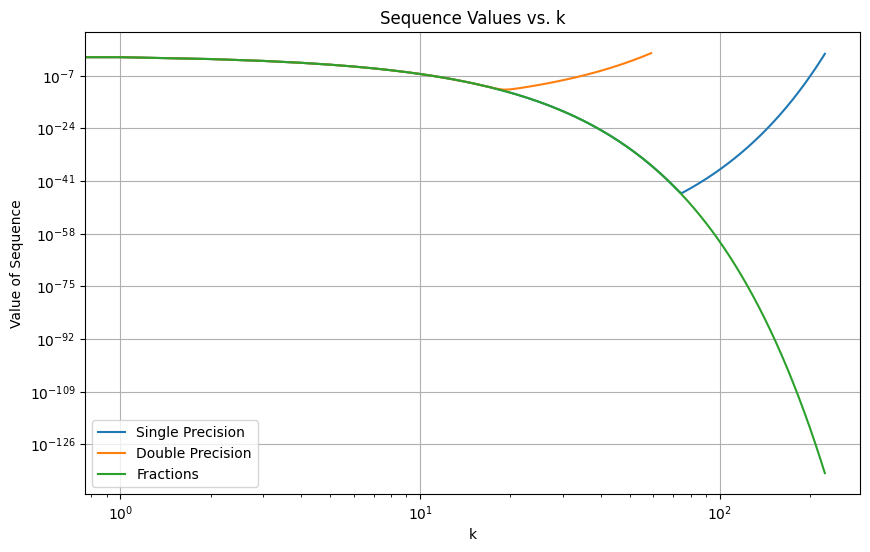

In [13]:
sequence_single = generate_sequence_single()
sequence_double = generate_sequence_double()
sequence_fraction = generate_sequence_fraction()

plt.figure(figsize=(10, 6))
plt.loglog(range(225), sequence_single, label='Single Precision')
plt.loglog(range(60), sequence_double, label='Double Precision')
plt.loglog(range(225), sequence_fraction, label='Fractions')
plt.xlabel('k')
plt.ylabel('Value of Sequence')
plt.title('Sequence Values vs. k')
plt.legend()
plt.grid(True)
plt.show()

### Implementacja funkcji repzentujacej faktyczna wartosc tego ciagu

In [14]:
def exact_solution(k):
    return 4 ** (-k) / 3

def absolute_relative_error(x, generate_function):
    return np.abs(exact_solution(x) - generate_function(x))

In [15]:
exact_values = [exact_solution(k) for k in range(225)]

error_single = []
for i in range(len(sequence_single)):
    error_single.append(absolute_relative_error(2, generate_sequence_single))
